In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('default')

In [3]:
# Read in the data set
df = pd.read_csv('./downloads/ames.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Display first few rows
df.head()

Dataset shape: (2930, 14)
Columns: ['Year_Built', 'Year_Remod_Add', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area', 'Sale_Price']


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [7]:
# Cleaning and preprocessing the data
print("Data Information:")
print("=" * 50)
df.info()

print("\nMissing values:")
print("=" * 50)
print(df.isnull().sum())

print("\nBasic statistics:")
print("=" * 50)
print(df.describe())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check data types
print(f"\nData types:")
print(df.dtypes)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB

Missing values:
Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath

Exploratory Data Analysis


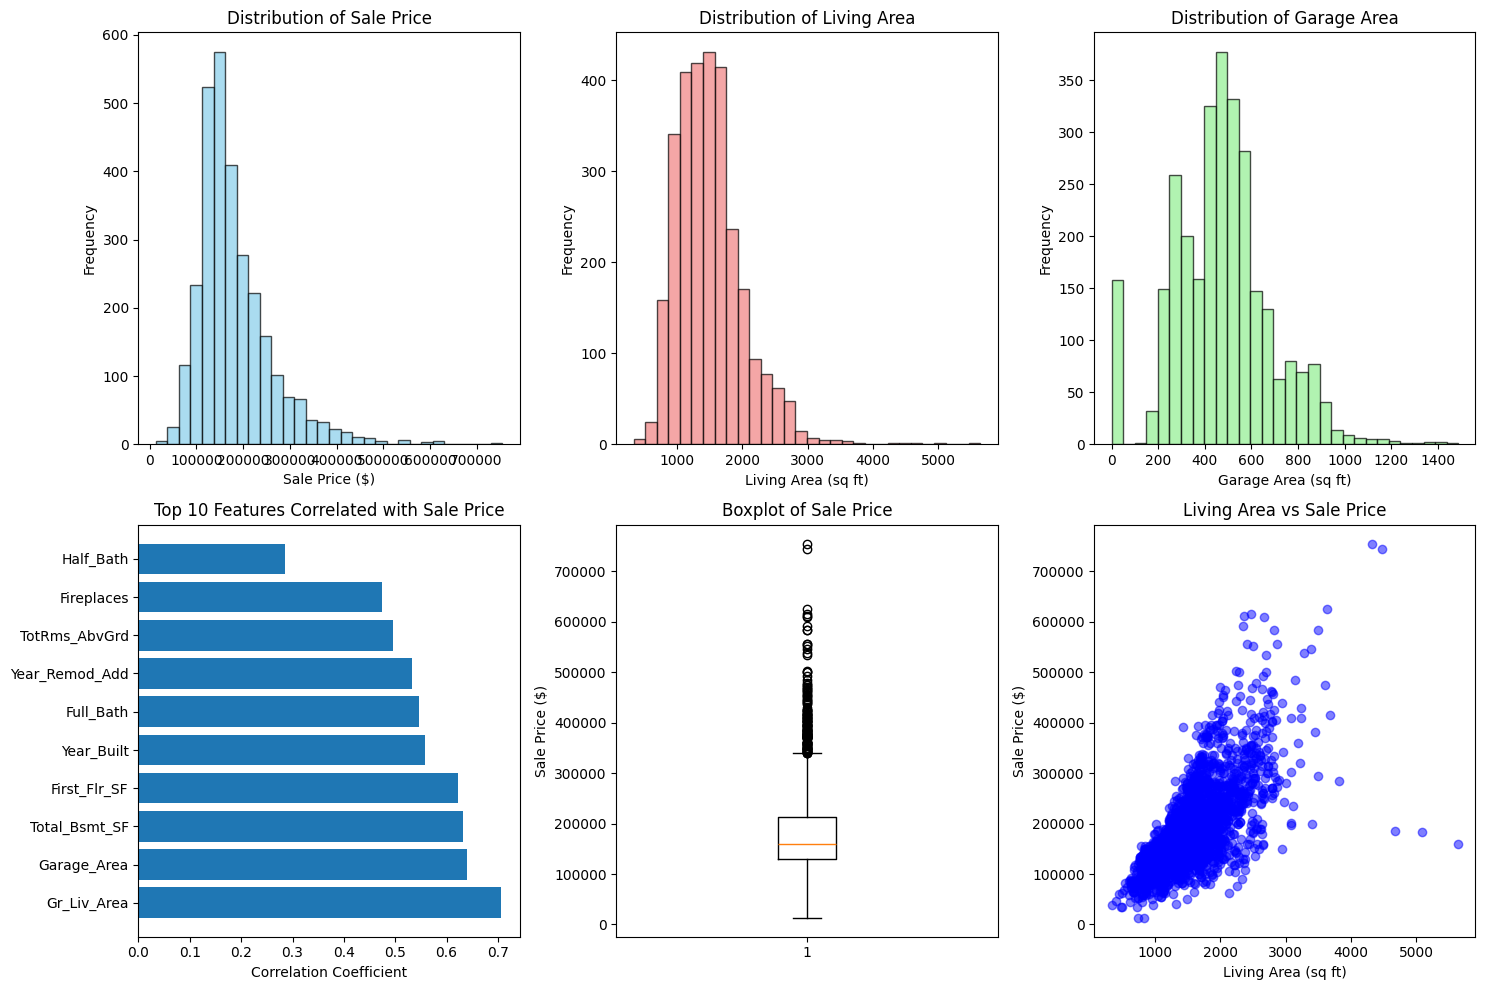


Correlation with Sale Price:
Gr_Liv_Area         : 0.707
Garage_Area         : 0.640
Total_Bsmt_SF       : 0.633
First_Flr_SF        : 0.622
Year_Built          : 0.558
Full_Bath           : 0.546
Year_Remod_Add      : 0.533
TotRms_AbvGrd       : 0.495
Fireplaces          : 0.475


In [5]:
# Exploring the data with visualisations 
print("Exploratory Data Analysis")
print("=" * 50)

# 1. Distribution of target variable
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Sale_Price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')

# 2. Distribution of key independent variables
plt.subplot(2, 3, 2)
plt.hist(df['Gr_Liv_Area'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['Garage_Area'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Garage Area')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Frequency')

# 3. Correlation matrix for numerical variables
plt.subplot(2, 3, 4)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Focus on correlation with Sale Price
price_corr = correlation_matrix['Sale_Price'].sort_values(ascending=False)
top_corr_features = price_corr[1:11]  # Top 10 features excluding Sale_Price itself

plt.barh(range(len(top_corr_features)), top_corr_features.values)
plt.yticks(range(len(top_corr_features)), top_corr_features.index)
plt.title('Top 10 Features Correlated with Sale Price')
plt.xlabel('Correlation Coefficient')

# 4. Boxplot of Sale Price
plt.subplot(2, 3, 5)
plt.boxplot(df['Sale_Price'])
plt.title('Boxplot of Sale Price')
plt.ylabel('Sale Price ($)')

# 5. Scatter plot: Living Area vs Sale Price
plt.subplot(2, 3, 6)
plt.scatter(df['Gr_Liv_Area'], df['Sale_Price'], alpha=0.5, color='blue')
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

plt.tight_layout()
plt.show()

print(f"\nCorrelation with Sale Price:")
print("=" * 50)
for feature, corr in price_corr.items():
    if feature != 'Sale_Price' and abs(corr) > 0.3:
        print(f"{feature:20}: {corr:.3f}")

In [6]:
# Spliting the independent variables from the dependent variable
X = df[['Gr_Liv_Area', 'Garage_Area']]  # Independent variables
y = df['Sale_Price']  # Dependent variable

print("Independent variables (X):")
print(f"Shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

print(f"\nDependent variable (y):")
print(f"Shape: {y.shape}")
print(f"Name: {y.name}")

print(f"\nSummary statistics for independent variables:")
print(X.describe())

Independent variables (X):
Shape: (2930, 2)
Features: ['Gr_Liv_Area', 'Garage_Area']

Dependent variable (y):
Shape: (2930,)
Name: Sale_Price

Summary statistics for independent variables:
       Gr_Liv_Area  Garage_Area
count  2930.000000  2930.000000
mean   1499.690444   472.658362
std     505.508887   215.187196
min     334.000000     0.000000
25%    1126.000000   320.000000
50%    1442.000000   480.000000
75%    1742.750000   576.000000
max    5642.000000  1488.000000


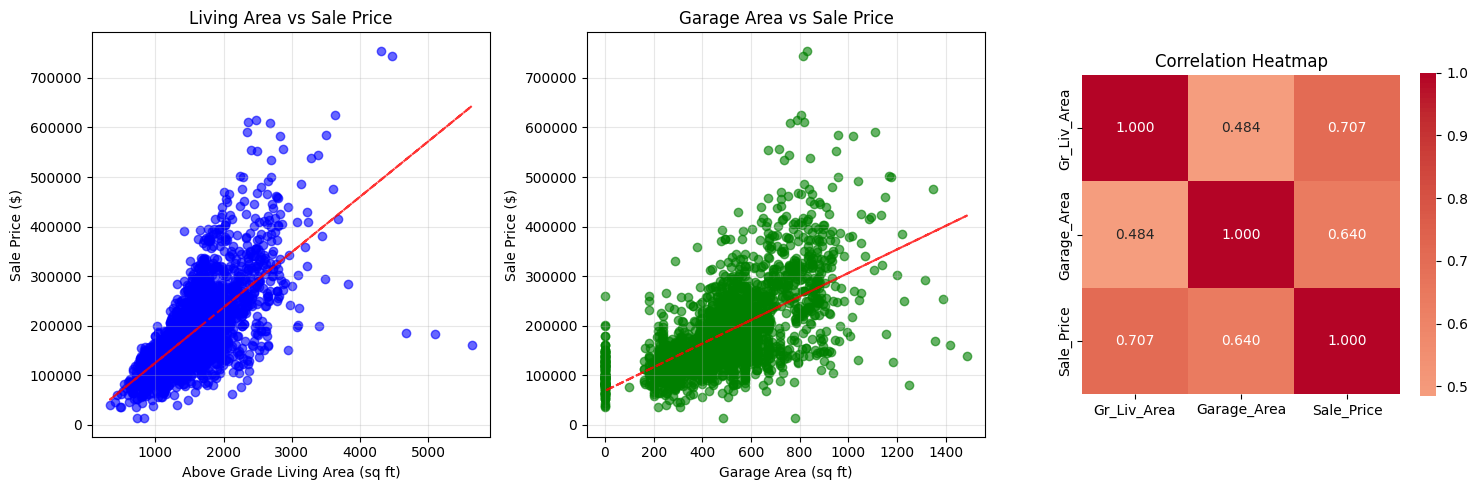

Correlation coefficients:
Gr_Liv_Area vs Sale_Price: 0.707
Garage_Area vs Sale_Price: 0.640


In [8]:
# Generating plots to explore the relationships between the independent and dependent variables
plt.figure(figsize=(15, 5))

# Plot 1: Living Area vs Sale Price
plt.subplot(1, 3, 1)
plt.scatter(X['Gr_Liv_Area'], y, alpha=0.6, color='blue')
plt.title('Living Area vs Sale Price')
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(X['Gr_Liv_Area'], y, 1)
p = np.poly1d(z)
plt.plot(X['Gr_Liv_Area'], p(X['Gr_Liv_Area']), "r--", alpha=0.8)

# Plot 2: Garage Area vs Sale Price
plt.subplot(1, 3, 2)
plt.scatter(X['Garage_Area'], y, alpha=0.6, color='green')
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(X['Garage_Area'], y, 1)
p = np.poly1d(z)
plt.plot(X['Garage_Area'], p(X['Garage_Area']), "r--", alpha=0.8)

# Plot 3: Correlation heatmap for selected features
plt.subplot(1, 3, 3)
selected_features = ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']
corr_selected = df[selected_features].corr()
sns.heatmap(corr_selected, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

print("Correlation coefficients:")
print(f"Gr_Liv_Area vs Sale_Price: {df['Gr_Liv_Area'].corr(df['Sale_Price']):.3f}")
print(f"Garage_Area vs Sale_Price: {df['Garage_Area'].corr(df['Sale_Price']):.3f}")

In [9]:
# Creating a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Data split completed:")
print(f"Training set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

Data split completed:
Training set - X: (2197, 2), y: (2197,)
Test set - X: (733, 2), y: (733,)
Training samples: 2197 (75.0%)
Test samples: 733 (25.0%)


In [12]:
# Building a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
model = LinearRegression()
model.fit(X_train, y_train)

print("Multiple Linear Regression model trained successfully!")
print(f"Features used: {X_train.columns.tolist()}")

Multiple Linear Regression model trained successfully!
Features used: ['Gr_Liv_Area', 'Garage_Area']


In [13]:
# Printing the trained model's intercept and coefficients
print("Model Coefficients and Intercept:")
print("=" * 40)
print(f"Intercept: ${model.intercept_:.2f}")

print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature:15}: ${coef:10.2f}")

print(f"\nInterpretation:")
print(f"- Each additional square foot of living area adds ${model.coef_[0]:.2f} to the predicted sale price")
print(f"- Each additional square foot of garage area adds ${model.coef_[1]:.2f} to the predicted sale price")
print(f"- The base price (when both areas are zero) is ${model.intercept_:.2f}")

Model Coefficients and Intercept:
Intercept: $-5059.45

Coefficients:
  Gr_Liv_Area    : $     78.69
  Garage_Area    : $    141.15

Interpretation:
- Each additional square foot of living area adds $78.69 to the predicted sale price
- Each additional square foot of garage area adds $141.15 to the predicted sale price
- The base price (when both areas are zero) is $-5059.45


In [14]:
# Generating predictions for the test set
y_pred = model.predict(X_test)

print("Predictions generated successfully!")
print(f"First 10 predictions vs actual:")
print("=" * 40)
for i in range(10):
    print(f"Predicted: ${y_pred[i]:,.2f} | Actual: ${y_test.iloc[i]:,.2f} | Difference: ${abs(y_pred[i] - y_test.iloc[i]):,.2f}")

Predictions generated successfully!
First 10 predictions vs actual:
Predicted: $158,224.09 | Actual: $161,000.00 | Difference: $2,775.91
Predicted: $113,256.68 | Actual: $116,000.00 | Difference: $2,743.32
Predicted: $217,552.82 | Actual: $196,500.00 | Difference: $21,052.82
Predicted: $72,846.49 | Actual: $123,600.00 | Difference: $50,753.51
Predicted: $94,782.71 | Actual: $126,000.00 | Difference: $31,217.29
Predicted: $159,556.52 | Actual: $174,190.00 | Difference: $14,633.48
Predicted: $147,050.45 | Actual: $200,000.00 | Difference: $52,949.55
Predicted: $171,621.48 | Actual: $148,500.00 | Difference: $23,121.48
Predicted: $81,392.39 | Actual: $88,750.00 | Difference: $7,357.61
Predicted: $283,579.84 | Actual: $409,900.00 | Difference: $126,320.16


In [15]:
# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("=" * 40)
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

print(f"\nInterpretation:")
print(f"- RMSE of ${rmse:,.2f} means typical predictions are within ±${rmse:,.2f} of actual prices")
print(f"- R² of {r2:.4f} means the model explains {r2*100:.1f}% of variance in sale prices")

Model Performance Metrics:
Mean Squared Error (MSE): $2,634,371,879.69
Root Mean Squared Error (RMSE): $51,326.13
R-squared (R²) Score: 0.6386

Interpretation:
- RMSE of $51,326.13 means typical predictions are within ±$51,326.13 of actual prices
- R² of 0.6386 means the model explains 63.9% of variance in sale prices


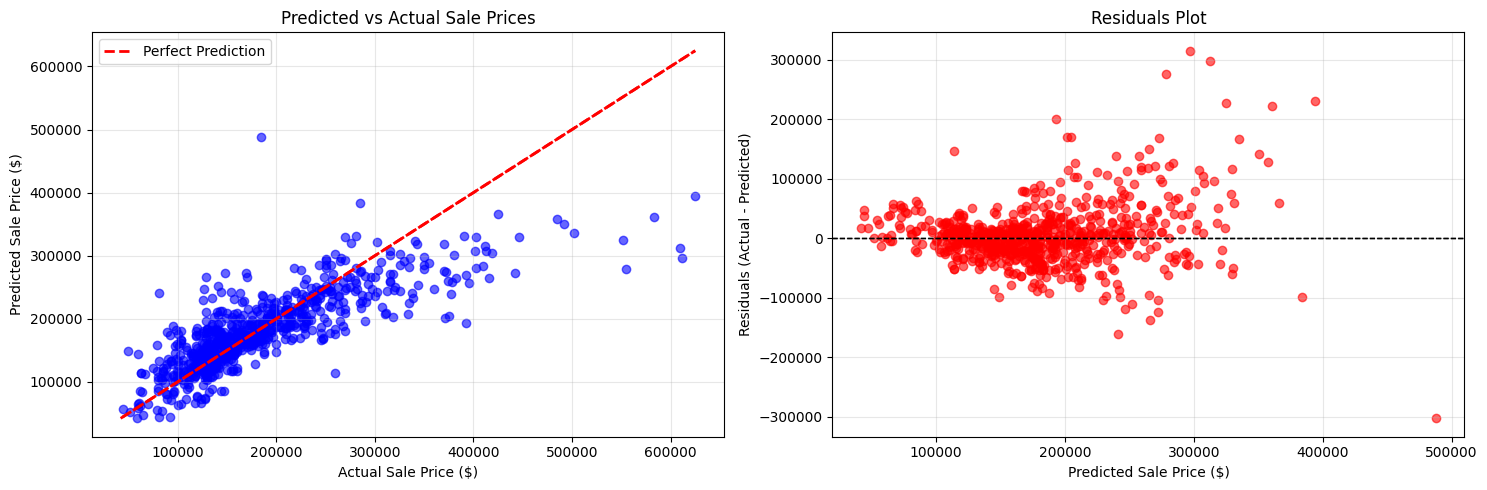

Residual Analysis:
Mean of residuals: $4504.37
Standard deviation of residuals: $51163.01


In [16]:
# Generating an error plot to visualise the differences between the predicted and actual values
plt.figure(figsize=(15, 5))

# Plot 1: Predicted vs Actual values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Predicted vs Actual Sale Prices')
plt.grid(True, alpha=0.3)

# Adding perfect prediction line
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
plt.legend()

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Adding zero line
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("Residual Analysis:")
print(f"Mean of residuals: ${residuals.mean():.2f}")
print(f"Standard deviation of residuals: ${residuals.std():.2f}")

In [ ]:
# Printing the coefficients and interpret them within the context of the median value prediction
median_price = df['Sale_Price'].median()
median_living_area = df['Gr_Liv_Area'].median()
median_garage_area = df['Garage_Area'].median()

print("Coefficient Interpretation in Context:")
print("=" * 50)
print(f"Median Sale Price: ${median_price:,.2f}")
print(f"Median Living Area: {median_living_area:.0f} sq ft")
print(f"Median Garage Area: {median_garage_area:.0f} sq ft")

print(f"\nImpact Analysis:")
print(f"- A 100 sq ft increase in living area adds ${model.coef_[0] * 100:,.2f} to price")
print(f"  (This is {model.coef_[0] * 100 / median_price * 100:.1f}% of median price)")

print(f"- A 100 sq ft increase in garage area adds ${model.coef_[1] * 100:,.2f} to price")
print(f"  (This is {model.coef_[1] * 100 / median_price * 100:.1f}% of median price)")

print(f"\nPrediction for median-sized house:")
median_prediction = (model.intercept_ + 
                    model.coef_[0] * median_living_area + 
                    model.coef_[1] * median_garage_area)
print(f"Predicted price: ${median_prediction:,.2f}")
print(f"Actual median price: ${median_price:,.2f}")
print(f"Difference: ${abs(median_prediction - median_price):,.2f}")